### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

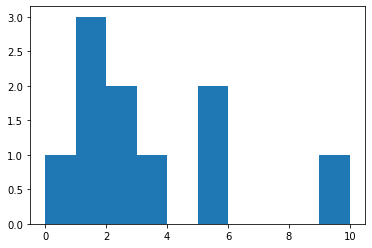

In [9]:
plt.hist(X[1])
plt.show()

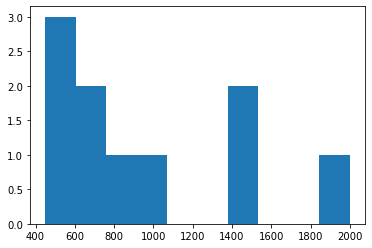

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

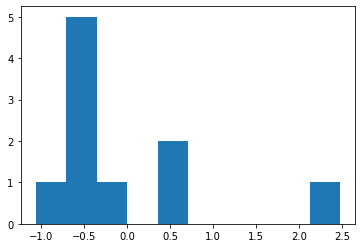

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
X_st[2] = calc_std_fit(X[2])

In [16]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [19]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.04261542  4.49722773  3.71886843  4.06956443] 85.79012093181089
200 [55.51100497  5.11010118  2.89774031  4.37971638] 27.737708106288
300 [56.36883992  5.47681433  2.25043642  4.6926068 ] 26.078566062381363
400 [56.48260561  5.71018206  1.74327686  4.98895643] 25.65795303774839
500 [56.49769316  5.86427274  1.34121003  5.25335542] 25.400386093121732
600 [56.49969407  5.96993804  1.01972344  5.48148002] 25.23264503198627
700 [56.49995943  6.04506715  0.7611154   5.67438998] 25.122162983361278
800 [56.49999462  6.1002367   0.55221446  5.83547912] 25.049045842770703
900 [56.49999929  6.14185775  0.38297809  5.96891008] 25.000550415589107
1000 [56.49999991  6.17393651  0.24560316  6.07884644] 24.968352975347493


array([56.49999991,  6.17393651,  0.24560316,  6.07884644])

In [20]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [21]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.50779783  5.89994063  1.24319476  5.33287076] 13.363397891294294
1000 [56.51045886  6.19064093  0.20544259  6.11763392] 12.04379475034709
1500 [56.51056129  6.270158   -0.15995543  6.41577628] 11.559587963239686
2000 [56.51059905  6.29747979 -0.29099756  6.52384014] 11.386177706750491
2500 [56.51061268  6.30724274 -0.33811763  6.56275634] 11.32403178292805
3000 [56.51061759  6.31075148 -0.35506745  6.57675811] 11.301712836191326
3500 [56.51061936  6.31201353 -0.36116489  6.58179519] 11.293689029260202
4000 [56.51061999  6.31246753 -0.36335837  6.58360722] 11.29080324653235
4500 [56.51062022  6.31263085 -0.36414745  6.58425908] 11.289765210290344
5000 [56.5106203   6.31268961 -0.36443131  6.58449358] 11.289391800783044


array([56.5106203 ,  6.31268961, -0.36443131,  6.58449358])

L1 регуляризация

f(x, W) + (lambda_/2) * np.sum(np.abs(W))

L2 регуляризация

f(x, W) + (lambda_/2) * np.sum(W**2)

In [22]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [23]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [24]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.413829625514786
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475404
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565486
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.90571241785009
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.9046212549912
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007856
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.904618882079912


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

### Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [25]:
lambdas = list(np.linspace(0.001, 1, 1000))
weights = {i: [] for i in range(X_st.shape[0])}

for l in lambdas:
    result = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l)
    for key, value in enumerate(result):
        weights[key].append(value)

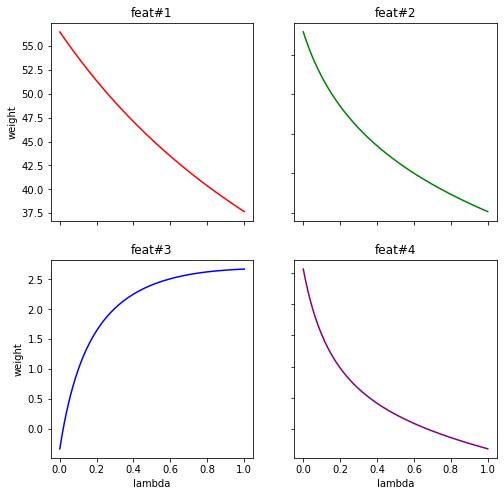

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0][0].plot(lambdas, weights[0], c='red');
axs[0][0].set_title('feat#1')

axs[0][1].plot(lambdas, weights[1], c='green');
axs[0][1].set_title('feat#2')

axs[1][0].plot(lambdas, weights[2], c='blue');
axs[1][0].set_title('feat#3')

axs[1][1].plot(lambdas, weights[3], c='purple');
axs[1][1].set_title('feat#4')

for ax in axs.flat:
    ax.set(xlabel='lambda', ylabel='weight');
    ax.label_outer();

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию? Нормализацию и стандартизацию применить к одному и тому же признаку последовательно можно. Но на практике это не имеет смыла, так как нормализация и стандартизация применяются для разных задач.

In [27]:
class Scaler:
    
    @staticmethod
    def normalize(x: np.ndarray) -> np.ndarray:
        return (x - x.min()) / (x.max() - x.min())
    
    @staticmethod
    def standartize(x: np.ndarray) -> np.ndarray:
        return (x - x.mean()) / x.std()

scaler = Scaler()

print(scaler.normalize(scaler.standartize(X[1])))

[0.1 0.1 0.2 0.5 0.3 0.  0.5 1.  0.1 0.2]


Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [28]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W / np.abs(W)) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 25.23723048428872, веса: [56.49765252  5.89983016  1.03995035  5.52753399]
# итерация: 1000, MSE: 24.946863925110584, веса: [56.49994991  6.19557479  0.13437972  6.1719267 ]
# итерация: 1500, MSE: 24.910108007836477, веса: [56.49995     6.26619417 -0.18003166  6.42624591]
# итерация: 2000, MSE: 24.905338328495585, веса: [56.49995     6.28977817 -0.29255956  6.51886362]
# итерация: 2500, MSE: 24.90471511007812, веса: [56.49995     6.29817619 -0.33303449  6.55225795]
# итерация: 3000, MSE: 24.904632468343543, веса: [56.49995     6.30119434 -0.34760164  6.56428089]
# итерация: 3500, MSE: 24.904621077947183, веса: [56.49995     6.30228045 -0.35284488  6.5686086 ]
# итерация: 4000, MSE: 24.904619356208052, веса: [56.49995     6.30267138 -0.35473214  6.57016633]
# итерация: 4500, MSE: 24.904619044589147, веса: [56.49995     6.30281209 -0.35541145  6.57072702]
# итерация: 5000, MSE: 24.90461897234217, веса: [56.49995     6.30286274 -0.35565596  6.57092884]


array([56.49995   ,  6.30286274, -0.35565596,  6.57092884])